# 2.38 Python Matplotlib Часть 1

In [2]:
# подключение пакетов
import matplotlib.pyplot as plt,pylab as pl
import numpy as np,pandas as pd
# общий согласованный стиль графика
pl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Регулирование отображения объектов
Перенос свойств 
- методы
   - `plt.plot() → ax.plot()`
   - `plt.legend() → ax.legend()`
   - ...
- параметры
   - `plt.ylabel() → ax.set_ylabel()`
   - `plt.ylim() → ax.set_ylim()`
   - `plt.title() → ax.set_title()`
   - ...


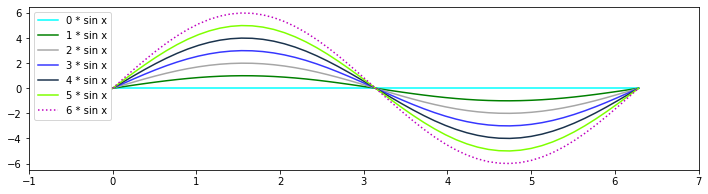

In [3]:
x = np.linspace(0,2*np.pi,50)
# цвет с именем, буквенный код цвета (rgbcmyk),
# оттенки серого между 0 и 1, hex код (RRGGBB от 00 до FF)
# RGB кортеж, значения от 0 до 1, HTML имена цветов
colors = ('cyan','g','.65','#3636ff',(.1,.2,.3),'chartreuse')
isin = lambda x,i: np.sin(x)*i
# MATLAB-стайлинг интерфейс
fig = pl.figure(figsize=(12,3))
for i in range(6):
    pl.plot(x,isin(x,i),color=colors[i],label='%d * sin x'%i)
# '-' solid, '--' dashed, '-.' dashdot, ':' dotted
# стиль линии и цвет одновременно 
pl.plot(x,isin(x,6),':m',label='6 * sin x')
# пояснения и координатная сетка
pl.legend(loc='best'); # pl.grid();
# границы осей координат 
pl.axis([-1,7,-6.5,6.5]);
# убрать изображение осей
# plt.axis('off');
# единицы измерения х и y равны
# plt.axis('equal');
pl.show();

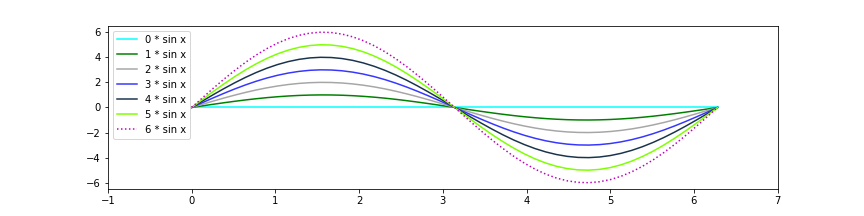

In [4]:
# сохранение и отображение графиков
fig.savefig('figure1.png')
from IPython.display import Image
Image('figure1.png')

In [5]:
!ls -lh figure1.png

-rw-r--r-- 1 root root 35K Mar  9 14:52 figure1.png


In [6]:
# поддерживаемые типы файлов
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Вид геометрических фигур

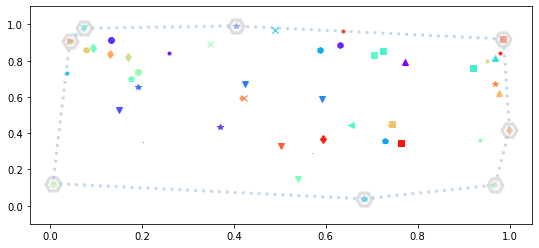

In [7]:
# механизм вычисления минимального многоугольника 
# включающего все точки
from scipy.spatial import ConvexHull
# выбор цветовой гаммы и вида маркера
cmaps=['ocean','cool','gnuplot2','terrain','jet',
       'winter','spring','summer','autumn','rainbow']
markers = ['.',',','*','x','+','v','^','<','>','s','p','d','h','o']
rng = np.random.default_rng()
n = 50; xy = rng.random((n,2))
markers = np.random.choice(markers,size=n)
colors = [pl.get_cmap(cmaps[9])(i/n) for i in range(n)]
hull = ConvexHull(xy)
pl.figure(figsize=(9,4))
for i in range(n):
    pl.plot(xy[i,0],xy[i,1],markers[i],color=colors[i])
for simplex in hull.simplices:
    pl.plot(xy[simplex,0],xy[simplex,1],':H',color='steelblue',
         markersize=15,linewidth=3,alpha=.3,
         markerfacecolor='whitesmoke',markeredgecolor='silver',
         markeredgewidth=3);
pl.ylim(-.1,1.1);

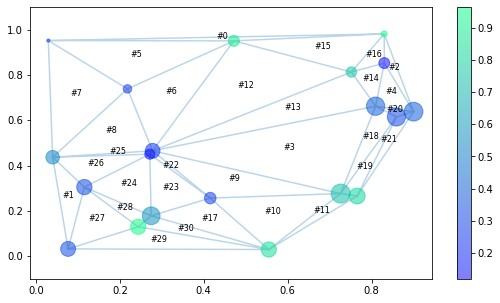

In [8]:
# механизм объединения точек треугольниками
from scipy.spatial import Delaunay
rng = np.random.default_rng()
n = 20; xy = rng.random((n,2))
tri = Delaunay(xy)
# возможность отобразить 4 параметра данных
# координаты, цвет, размер
colors = rng.random(n)
sizes = (500*rng.random(n)).round()
plt.figure(figsize=(9,5))
pl.triplot(xy[:,0],xy[:,1],tri.simplices,alpha=.3)
plt.scatter(xy[:,0],xy[:,1],c=colors,s=sizes,alpha=.5,cmap='winter')
pl.colorbar(); pl.ylim(-.1,1.1)
# нумерация вершин
#for j,p in enumerate(xy):
#    pl.text(p[0]-0.01,p[1]+.01,j,ha='right',fontsize=12)
# нумерация треугольников
for j,s in enumerate(tri.simplices):
    p = xy[s].mean(axis=0)
    pl.text(p[0],p[1],'#%d'%j,ha='center',fontsize=8)

## Размещение текста

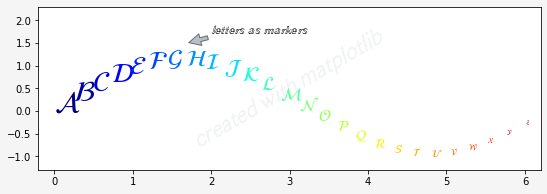

In [9]:
# объектно-ориентированный интерфейс
fig, ax = plt.subplots(figsize=(9,3),facecolor='whitesmoke')
get_fun = [func for func in dir(ax) if func.startswith("get")]
# "водяной знак"
ax.text(.5,.5,'$\mathcal{created \\; with \\; matplotlib}$', 
        transform=ax.transAxes,
        fontsize=24,color='slategray',alpha=.1,
        ha='center',va='center',rotation=30)
# заметки на графике
ax.annotate('$\mathbb{letters \\; as \\; markers}$',
            xy=(1.7,1.5),xytext=(2.,1.7),fontsize=12,
            arrowprops=dict(facecolor='slategray',alpha=.5,shrink=.05),)
def plot_text(n,ax=ax):
    x = np.linspace(0,6,n)
    y = np.sin(x)
# индивидуальный цвет для каждого объекта
    colors = [pl.get_cmap('jet')(i/n) for i in range(n)]
    ax.set_xlim(-.2,6.2)
    ax.set_ylim(-1.3,2.3)
    for i in range(n):
# сочетание с Latex форматированием
        ax.text(x[i],y[i],"$\mathcal{%s}$"%chr(65+i),
                color=colors[i],fontsize=30-i)
plot_text(26,ax=ax)

In [10]:
# методы для определения свойств объекта ах
get_fun[:5]

['get_adjustable', 'get_agg_filter', 'get_alpha', 'get_anchor', 'get_animated']

## Свойства объектов

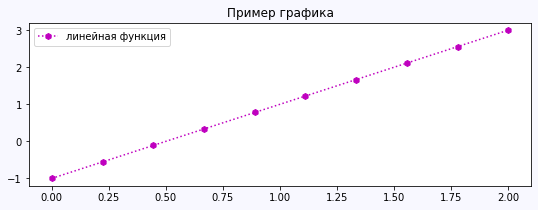

In [11]:
x = np.linspace(0, 2, 10)
set_dict = {'figsize':(9,3),'facecolor':'ghostwhite'}
fig, ax = pl.subplots(**set_dict)
# стиль линии, форма маркера и цвет одновременно 
l = ax.plot(x, 2*x-1, ':hm', label="линейная функция")
pl.legend()
ax.set_title("Пример графика");

In [12]:
# свойства конкретного объекта
pl.getp(l)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = m
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0.        , 0.22222222, 0.44444444, 0.6666...
    drawstyle or ds = default
    figure = Figure(648x216)
    fillstyle = full
    gid = None
    in_layout = True
    label = линейная функция
    linestyle or ls = :
    linewidth or lw = 1.5
    marker = h
    markeredgecolor or mec = m
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = m
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[ 0.        , -1.        ],        [ 0...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
    sketch_params = None
    snap = None
    solid_capstyle = projecting
    solid_joinstyle = round
    tra

In [13]:
# варианты управления свойствами объектов
pl.setp(l)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec:

## Пользовательское регулирование общих установок

In [14]:
from matplotlib import rcParams
pt = tuple(rcParams.items())
pt[30]+pt[120:122]

('axes.prop_cycle',
 cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
 ('figure.titleweight', 'normal'),
 ('font.cursive',
  ['Apple Chancery',
   'Textile',
   'Zapf Chancery',
   'Sand',
   'Script MT',
   'Felipa',
   'Comic Neue',
   'Comic Sans MS',
   'cursive']))

In [15]:
from cycler import cycler
# пользовательская цветовая гамма по умолчанию
color_lst = ['#FF355E','#FD5B78','#FF6037','#FF9966','#FF9933','#FFCC33',
             '#FFFF66','#CCFF00','#66FF66','#AAF0D1','#50BFE6','#FF6EFF',
             '#EE34D2','#FF00CC']
# Crayola Fluorescent Colors
color_names = ['Radical Red','Wild Watermelon','Outrageous Orange',
               'Atomic Tangerine','Neon Carrot','Sunglow',
               'Laser Lemon','Electric Lime','Screamin` Green',
               'Magic Mint', 'Blizzard Blue','Shocking Pink',
               'Razzle Dazzle Rose','Hot Magenta']
# для всей программной среды
rcParams['axes.prop_cycle'] = cycler('color',color_lst)

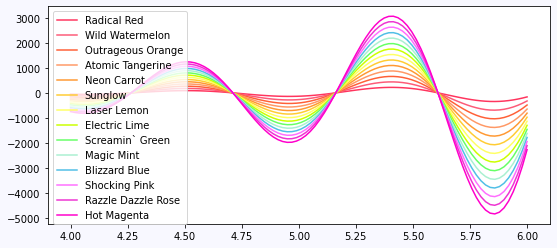

In [16]:
x = np.linspace(4, 6, 100)
set_dict = {'figsize':(9,4),'facecolor':'ghostwhite'}
fig, ax = pl.subplots(**set_dict)
# только для одного графика
#prop_cycler = (cycler('color',color_lst[:4])
#               +cycler(ls=["-","--","-.",":"])
#               +cycler(lw=[1,2,3,4]))
#ax.set_prop_cycle(prop_cycler)
# for i in range(4):
for i in range(14):
    ax.plot(x, np.exp(x)*np.cos(7*x)*(i+1)-i, label=color_names[i])
pl.legend(loc=2);

In [17]:
# сброс до установок по умолчанию
plt.rcdefaults()
pl.rcdefaults()

## Упрощение и ускорение анимации
Рекомендованная стратегия:
- подготовка постоянной основы
    - прорисовать все неизменные объекты 
    - пометить анимированные объекты `Artist.set_animated`
    - сохранить копию буфера RBGA
- загрузка отдельных изображений
    - восстановить копию буфера RGBA
    - перерисовать анимированные объекты `Axes.draw_artist / Figure.draw_artist`
- показать результат на экране


In [18]:
# анимация внутри ноутбука с созданием файла .gif
import PIL,time,imageio,ipywidgets as ipw, numpy as np
from IPython.display import display,Image
from io import BytesIO
def gif_animate(w=300,h=300,file_name='pic.gif'):
    iw_img = ipw.Image()
    display(iw_img)
    g = 210*np.ones((h,w,3), dtype=np.uint8)
    c = np.array([h//2,w//2], dtype=int)
    imgs = [g.copy()]
    for i in range(120,720):
        r,theta = i/6,i/2
        p = c+r*np.array([np.cos(theta),np.sin(theta)])
        (y,x) = p.astype(int)
        rgb = np.array([(i-120)%240,0,(360-i)%240],dtype=np.uint8)
        white = np.array([255,255,255], dtype=np.uint8)
        g[y-1:y+2,x-1:x+2,:] = white
        g[y:y+3,x:x+3,:] = rgb
        imgs.append(g.copy())
        pil_img = PIL.Image.fromarray(g)
        with BytesIO() as BIO:
            pil_img.save(BIO, format='png')
            png = BIO.getvalue()
        iw_img.value = png
        time.sleep(.1)
    imgs = np.array(imgs,dtype=np.uint8)
    print(imgs.shape)
    imageio.mimsave(file_name,imgs)
gif_animate()

Image(value=b'')

(601, 300, 300, 3)


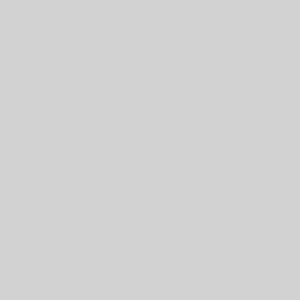

In [19]:
Image(open('pic.gif','rb').read())

## Расширенные возможности анимации

In [20]:
from IPython.core.display import display,HTML
import random
def sage_coderun(code_str):
    randi=str(random.randint(0,9999999))
    html_str="""
<html><head><meta charset='utf-8'>
<script src='https://sagecell.sagemath.org/static/embedded_sagecell.js'></script>
<script>$(function(){
    sagecell.makeSagecell({
        inputLocation:'#cell"""+randi+"""',evalButtonText:'запустить'}); });
</script></head>
<style>.sagecell .CodeMirror-scroll {min-height:3em; max-height:70em;}</style>
<body><div id='cell"""+randi+"""'><script type='text/x-sage'>
"""+code_str+"""
</script></div></body></html>"""
    html_file=f'sage_coderun{randi}.html'
    with open(html_file,'w') as f:
        f.write(html_str); f.close()
    return html_file
def display_htmlstr(html_str):
    html_str='''
    <div style="border:10px double white; 
    width:610px; height:310px; overflow:auto; 
    padding:5px; background-color:ghostwhite">
    <iframe src="'''+html_str+\
    '''" width="600" height="300"></iframe></div>'''
    from IPython.display import display,HTML
    display(HTML(html_str))

In [21]:
html_file = sage_coderun("""
print('Код в этой ячейке можно изменить и затем запустить программу',
      'Пример анимации с расширением SageMath','',sep='\\n')
import numpy as np
# рассматривается набор 9 квадратов в таблице 3Х3
# задача - попасть во все ячейки при условии, что
# это попадание в них происходит случайно
def random_coords(i):
# квадраты пронумерованы от 0 до 8
    idx=randint(0,8)
    x,y=i+idx//3-1,idx%3
# случайным образом выбирается номер квадрата 
# и определяются его координаты в соответствии с номером
    return x,y,idx
# график с изображением таблицы
def maplot(arr,st):
    m=matrix(arr.tolist())
    m.subdivide([1,2],[1,2])
# белым обозначены квадраты, по которым уже попали
    mp=matrix_plot(m,figsize=(3,3),cmap='bone',frame=False,
                   title=st,subdivisions=True,
                   subdivision_style=dict(color='slategray'))
    return mp
# начальный списк номеров всех ячеек
goal=list(range(9))
arr=np.array(3*[3*[.1]])
mps=[maplot(arr,'[-1,-1],-1')]
c=0
# пока в списке есть еще хоть одна ячейка
while goal!=[]:
    x,y,idx=random_coords(1)
    st=str(([x+1,y+1],idx+1))
# закрашивание ячейки в оттенках серого цвета
    arr[x][y]=.3
# удаление из списка, если попадание по клетке произошло
    if idx in goal: goal.remove(idx)
# добавление графического изображения этапа
    mps+=[maplot(arr,st)]
    c+=1
pretty_print(html('Для заполнения потребовалось %d случайных пар (x,y)'%c))
animate(mps).show()
""")

In [22]:
# в рабочем пространстве есть файл sage_coderun???.html
# его можно скачать и открыть в браузере